In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Load data

In [46]:
data = load_iris()
target_names = list(data.target_names)

In [47]:
df = pd.DataFrame(np.concatenate((data.data, np.array([data.target]).T), axis=1), columns=data.feature_names + ['target'])

In [48]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [50]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('_\(cm\)', '')

/var/folders/4t/35nfm0b159g9bz03rt5zzm_h0000gn/T/ipykernel_79084/3604104236.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('_\(cm\)', '')


In [51]:
df['target'] = df['target'].astype('int')

## Exploratory data analysis

Text(0.5, 1.0, 'Iris species')

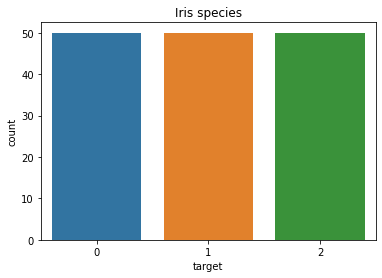

In [52]:
sns.countplot(x="target", data=df);
plt.title("Iris species")

In [54]:
features = [feature for feature in df.columns.to_list() if feature not in ('target')]

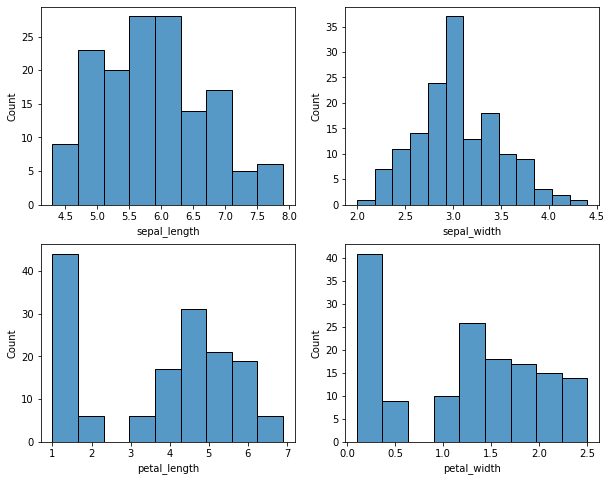

In [62]:
plt.figure(figsize=(10, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature])

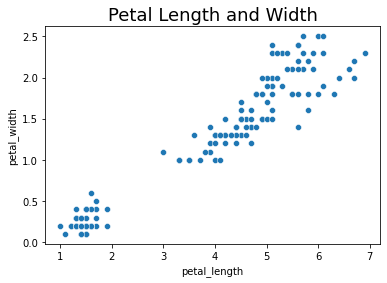

In [63]:
sns.scatterplot(x='petal_length', y='petal_width', data=df);
plt.title('Petal Length and Width', fontsize=18);

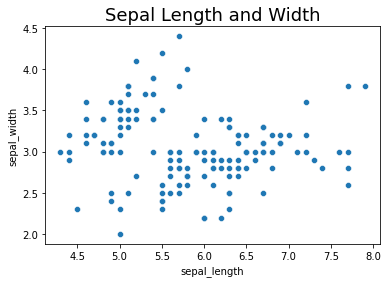

In [64]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df);
plt.title('Sepal Length and Width', fontsize=18);

<AxesSubplot:>

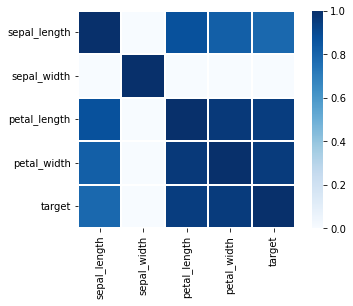

In [67]:
corr = df.corr()
sns.heatmap(corr, vmin=0, vmax=1, linewidths=2, square=True, cmap='Blues')

## Baseline model

In [77]:
X = df[features]
y = df.target

kn = KNeighborsClassifier()

scores = cross_val_score(kn, X, y, scoring='accuracy', cv=5)

print(np.mean(scores))

0.9733333333333334


In [82]:
lr = LogisticRegression(solver='liblinear')

scores = cross_val_score(lr, X, y, scoring='accuracy', cv=5)

print(np.mean(scores))

0.9600000000000002


## Hyperparameter tunning

In [84]:
param_grid ={'n_neighbors': [3, 5, 7, 10]}

kn = KNeighborsClassifier()

grid_search = GridSearchCV(kn, param_grid=param_grid, scoring='accuracy', cv=3, )

In [85]:
grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10]}, scoring='accuracy')

In [86]:
print(grid_search.best_params_)

{'n_neighbors': 5}


In [87]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.0013663 , 0.00112295, 0.00092363, 0.00101368]), 'std_fit_time': array([2.83641921e-04, 1.11462152e-04, 8.24280302e-05, 1.04302308e-04]), 'mean_score_time': array([0.00326697, 0.00256809, 0.00171367, 0.00183566]), 'std_score_time': array([0.00061003, 0.00050439, 0.00010491, 0.00018747]), 'param_n_neighbors': masked_array(data=[3, 5, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 10}], 'split0_test_score': array([0.98, 0.98, 0.98, 0.96]), 'split1_test_score': array([0.96, 0.98, 0.98, 1.  ]), 'split2_test_score': array([0.98, 0.98, 0.96, 0.94]), 'mean_test_score': array([0.97333333, 0.98      , 0.97333333, 0.96666667]), 'std_test_score': array([0.00942809, 0.        , 0.00942809, 0.02494438]), 'rank_test_score': array([2, 1, 2, 4], dtype=int32)}
